In [1]:
import torch
import numpy as np


/root/anaconda3/envs/foldingdiff/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [91]:
method = 'PiFold' # method='PiFold', 'StructGNN', 'GraphTrans', 'AlphaDesign', 'ProteinMPNN', 'GVP', 'GCA', 'KWDesign'(KWDesign之前崩溃了, 还在跑)
result = torch.load(f"/gaozhangyang/experiments/OpenCPD/results/MPNN/{method}/results_casp15.pt")
temperature = 0.0 # temperature取0(使用argmax采样), 0.1, 0.5, 1.0



tokenizer = result['tokenizer']
alphabet='ACDEFGHIKLMNPQRSTVWY'
mask_token = []
for token, idx in tokenizer.get_vocab().items():
    if token not in alphabet:
        mask_token.append(idx)

raw_probs = result['pred_probs'][0]
raw_probs[:, mask_token] = -10000
if temperature==0:
    probs = raw_probs
else:
    probs = torch.softmax(raw_probs/temperature, dim=-1)



NameError: name 'torch' is not defined

In [4]:
all_rmsd = []
all_div = []
for iter in range(10):
    if temperature==0:
        pred_seq_id = torch.argmax(probs, 1).squeeze(-1)
    else:
        pred_seq_id = torch.multinomial(probs, 1).squeeze(-1)
    true_seq = tokenizer.decode(result['true_seq'][0]).replace(" ", "")
    pred_seq = tokenizer.decode(pred_seq_id).replace(" ", "")
print(true_seq)

QLEDSEVEAVAKGLEEMYANGVTEDNFKNYVKNNFAQQEISSVEEELNVNISDSCVANKIKDEFFAMISISAIVKAAQKKAWKELAVTVLRFAKANGLKTNAIIVAGQLALWAVQCG


In [50]:
# 横轴为diversity纵轴为RMSD, 每个temperature下采样10个点，绘制散点图。不同temperature的点用不同颜色标明。
    rmsd = Cal_RMSD(true_seq, pred_seq)
    diversity = diversity = np.array([ true_res!=pred_res for true_res, pred_res in zip(true_seq, pred_seq)]).mean()
    all_rmsd.append(rmsd)
    all_div.append(diversity)

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [92]:
temperature = 0.0
res = pd.read_csv(f'/gaozhangyang/experiments/OpenCPD/sampling/tmp{temperature}.csv')
name_list = ['StructGNN', 'GraphTrans', 'GCA', 'GVP', 'AlphaDesign', 'ProteinMPNN', 'PiFold', 'KWDesign']

rec_list = []
rmsd_list = []
for name in name_list:
    mask = res['Method']==name
    rec = list(res[mask]['Recovery'])
    rmsd = list(res[mask]['RMSD'])
    rec_list.append(rec)
    rmsd_list.append(rmsd)

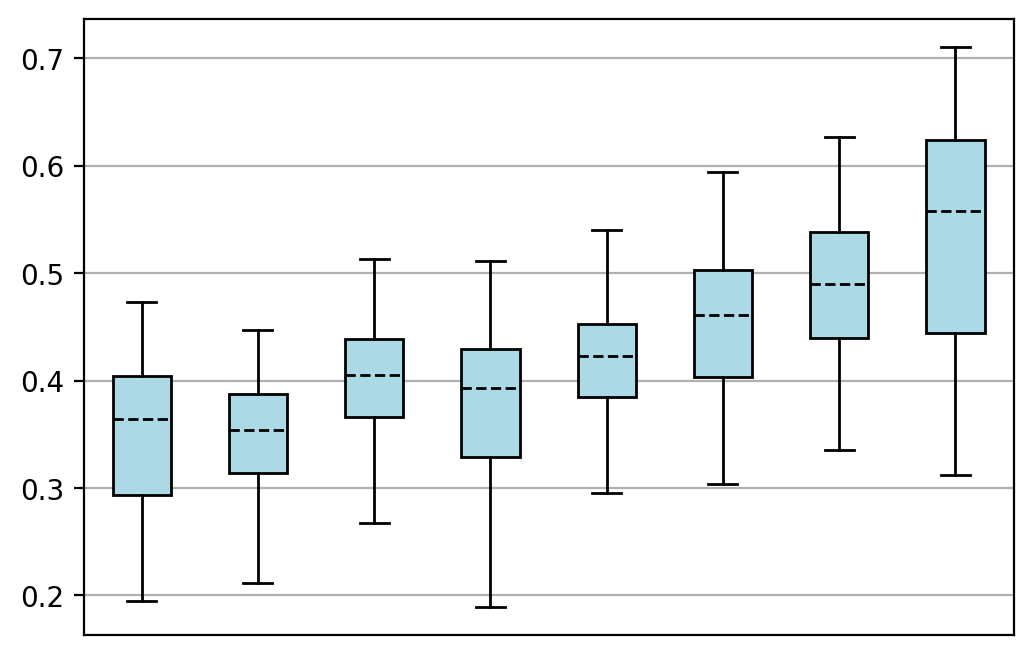

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=200)

# # 设置刻度标签
# ax.set_xticklabels(name_list, rotation=45)

# # 设置y轴标签
# ax.set_ylabel('Recovery')

bplot = ax.boxplot(rec_list,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     showfliers=False,
                     medianprops = {'color': 'black',  
                           'linewidth': 1,
                           'linestyle': '--'})  


for patch in bplot['boxes']:
    patch.set_facecolor('lightblue')
    
# 取消x轴标签
ax.set_xticks([])
ax.set_xticklabels([])
# ax.set_yticks([])
# ax.set_yticklabels([])
ax.yaxis.grid(True)
    
plt.savefig(f'./figs/rec_{temperature}.png', bbox_inches='tight')

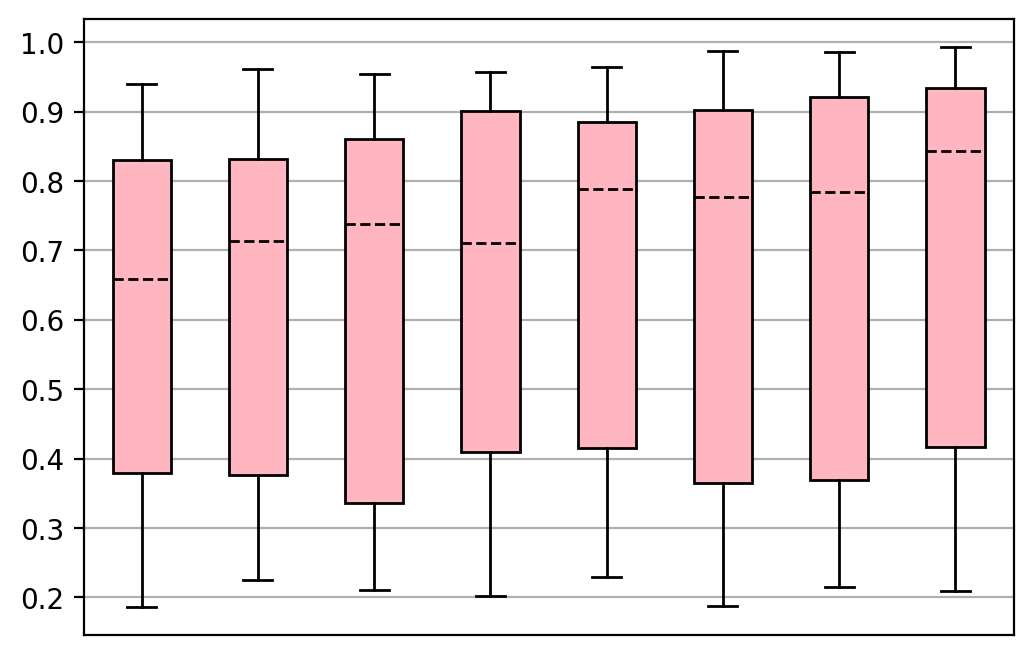

In [94]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=200)

# # 设置刻度标签
# ax.set_xticklabels(name_list, rotation=45)

# 设置y轴标签
# ax.set_ylabel('sc-TM')

bplot = ax.boxplot(rmsd_list,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     showfliers=False,
                     medianprops = {'color': 'black',  
                           'linewidth': 1,
                           'linestyle': '--'})  


for patch in bplot['boxes']:
    patch.set_facecolor('lightpink')
    
ax.set_xticks([])
ax.set_xticklabels([])
ax.yaxis.grid(True)
    
# 显示图表
plt.savefig(f'./figs/sc-TM_{temperature}.png', bbox_inches='tight')

In [106]:
data = pd.read_csv('/gaozhangyang/experiments/OpenCPD/sampling/rec_div.csv')

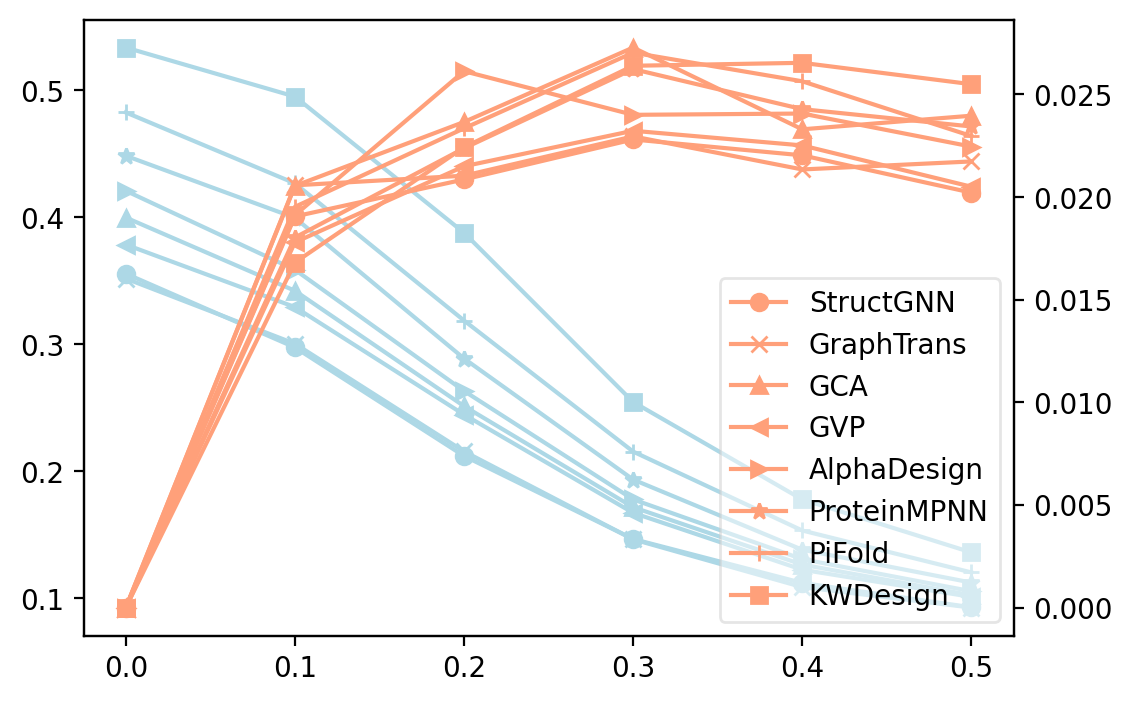

In [118]:
# 数据
# method = 'PiFold'
# 创建图形对象和两个子图
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=200)
ax2 = ax1.twinx()
symbols = ['o', 'x', '^', '<', '>', '*', '+', 's']
for idx, method in enumerate(['StructGNN', 'GraphTrans', 'GCA', 'GVP', 'AlphaDesign', 'ProteinMPNN', 'PiFold', 'KWDesign']):
    mask = data['method']==method
    tem = data['temperature'][mask]
    rec = data['rec'][mask]
    div = data['div'][mask]
    div = np.sqrt(div)

    ax1.plot(tem, rec, f'{symbols[idx]}-', color='lightblue', label=method)  # 圆圈标记散点

    # 创建右y轴
    ax2.plot(tem, div, f'{symbols[idx]}-', color='lightsalmon', label=method)  # 圆圈标记散点
# ax.yaxis.grid(True)
plt.legend(facecolor='white', framealpha=0.5)
plt.savefig('/gaozhangyang/experiments/OpenCPD/figs/rec_div.png', bbox_inches='tight')

42    3.324588e-08
43    1.681035e-02
44    2.242704e-02
45    2.639748e-02
46    2.654188e-02
47    2.550002e-02
Name: div, dtype: float64

In [96]:
data

,Unnamed: 0,method,temperature,rec,div
0,0,PiFold,0.0,0.482579,8.092292e-16
1,1,PiFold,0.1,0.425564,3.662053e-04
2,2,PiFold,0.2,0.320811,5.877092e-04
3,3,PiFold,0.3,0.214432,6.561728e-04
4,4,PiFold,0.4,0.154099,6.491095e-04
...,...,...,...,...,...
83,83,KWDesign,0.6,0.113865,4.949018e-04
84,84,KWDesign,0.7,0.099987,5.124611e-04
85,85,KWDesign,0.8,0.091086,4.505209e-04
86,86,KWDesign,0.9,0.085101,3.962333e-04
